In [5]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query11a = """
    SELECT
    cast(selectsystems.created as date),
    cast(selectsystems.status_last_modified as date),
    cast(selectsystems.status_last_modified as date)-cast(selectsystems.created as date) as "Period",
    selectsystems.cost_to_client,
    selectsystems.status,
    selectsystems.billing_style
    FROM 
    selectsystems 
    WHERE 
    (selectsystems.status = 'Inactive' and 
    cast(selectsystems.status_last_modified as date) > '2022-05-01') and 
    (selectsystems.billing_style = 'Hourly' OR
    selectsystems.billing_style = 'Retainer')
    ORDER BY cast(selectsystems.created as date)
"""
dataset11a = sqlio.read_sql_query(query11a,conn)
df11a = pd.DataFrame(data=dataset11a)
df11a.to_csv('analysis11a.csv')
print(df11a)

       created status_last_modified  Period  cost_to_client    status  \
0   2021-04-16           2022-05-17     396            60.0  Inactive   
1   2021-10-20           2022-06-01     224            67.0  Inactive   
2   2021-10-27           2022-06-01     217            80.0  Inactive   
3   2021-11-05           2022-06-22     229            95.0  Inactive   
4   2021-11-18           2022-06-16     210           185.0  Inactive   
5   2021-11-29           2022-06-01     184            72.0  Inactive   
6   2022-01-18           2022-05-23     125          2000.0  Inactive   
7   2022-01-18           2022-06-22     155           100.0  Inactive   
8   2022-03-16           2022-06-22      98           100.0  Inactive   
9   2022-03-16           2022-06-22      98           350.0  Inactive   
10  2022-04-21           2022-06-01      41          3000.0  Inactive   
11  2022-04-21           2022-06-02      42            85.0  Inactive   
12  2022-05-02           2022-05-23      21        

In [23]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query11a = """
    SELECT 
    round(expert_contractor_invoices.amount + expert_contractor_invoices.sf_margin_amount::numeric, 2) as "Program Total Value",
    expert_contractor_invoices.billing_style_from_selectsystems,
    expert_contractor_invoices.status,
    expert_contractor_invoices.date_submitted
    FROM 
    expert_contractor_invoices 
    WHERE 
    (array_to_string(expert_contractor_invoices.billing_style_from_selectsystems, '', '*') = 'Hourly' 
    OR array_to_string(expert_contractor_invoices.billing_style_from_selectsystems, '', '*') = 'Retainer')
    AND
    (expert_contractor_invoices.status = 'Not Yet Invoiced For' OR
    expert_contractor_invoices.status = 'Paid but Not Yet Invoiced' OR
    expert_contractor_invoices.status = 'Not Yet Invoiced, But Pay' OR
    expert_contractor_invoices.status = 'Processing')
    AND
    expert_contractor_invoices.date_submitted > '2022-05-01'
    """
dataset11a = sqlio.read_sql_query(query11a,conn)
df11a = pd.DataFrame(data=dataset11a)
df11a.to_csv('analysis11a.csv')
print(df11a)

    Program Total Value billing_style_from_selectsystems      status  \
0                400.00                         [Hourly]  Processing   
1               1710.00                         [Hourly]  Processing   
2                960.00                         [Hourly]  Processing   
3                637.50                         [Hourly]  Processing   
4               1750.00                         [Hourly]  Processing   
..                  ...                              ...         ...   
61              1152.00                         [Hourly]  Processing   
62               665.00                         [Hourly]  Processing   
63               380.94                         [Hourly]  Processing   
64               179.23                         [Hourly]  Processing   
65               865.38                         [Hourly]  Processing   

   date_submitted  
0      2022-06-06  
1      2022-06-01  
2      2022-05-02  
3      2022-06-02  
4      2022-05-17  
..            .

In [25]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query11a = """
    with original AS
    (SELECT 
    round(expert_contractor_invoices.amount + expert_contractor_invoices.sf_margin_amount::numeric, 2) as "Program Total Value",
    expert_contractor_invoices.billing_style_from_selectsystems as "Billing Style",
    expert_contractor_invoices.status,
    expert_contractor_invoices.date_submitted
    FROM 
    expert_contractor_invoices 
    WHERE 
    (array_to_string(expert_contractor_invoices.billing_style_from_selectsystems, '', '*') = 'Hourly' 
    OR array_to_string(expert_contractor_invoices.billing_style_from_selectsystems, '', '*') = 'Retainer')
    AND
    (expert_contractor_invoices.status = 'Not Yet Invoiced For' OR
    expert_contractor_invoices.status = 'Paid but Not Yet Invoiced' OR
    expert_contractor_invoices.status = 'Not Yet Invoiced, But Pay' OR
    expert_contractor_invoices.status = 'Processing')
    AND
    expert_contractor_invoices.date_submitted > '2022-05-01')
    
    SELECT sum(original."Program Total Value"), original."Billing Style"
    FROM original
    GROUP BY original."Billing Style"
    """
dataset11a = sqlio.read_sql_query(query11a,conn)
df11a = pd.DataFrame(data=dataset11a)
df11a.to_csv('analysis11a.csv')
print(df11a)

        sum Billing Style
0  51557.48      [Hourly]
1   7500.00    [Retainer]


   Program Total Value Billing Style                      Date
0              7946.26        Hourly 2022-05-02 00:00:00+00:00
1               810.00        Hourly 2022-05-09 00:00:00+00:00
2              8846.90        Hourly 2022-05-16 00:00:00+00:00
3              2733.07        Hourly 2022-05-23 00:00:00+00:00
4             13514.24        Hourly 2022-05-30 00:00:00+00:00
5               400.00        Hourly 2022-06-06 00:00:00+00:00
6             17307.01        Hourly 2022-06-13 00:00:00+00:00
   Program Total Value Billing Style                      Date
0               7500.0      Retainer 2022-05-30 00:00:00+00:00


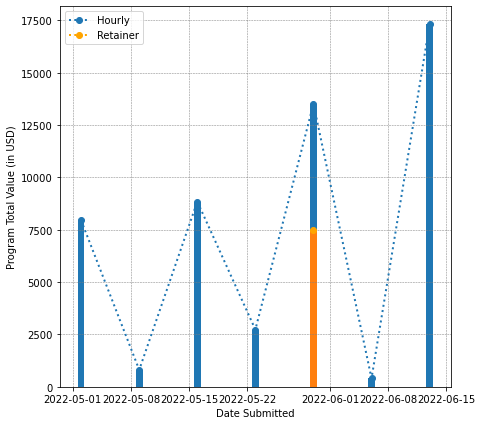

In [62]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query14a = """
    with original AS
    (SELECT 
    round(expert_contractor_invoices.amount + expert_contractor_invoices.sf_margin_amount::numeric, 2) as "Program Total Value",
    expert_contractor_invoices.billing_style_from_selectsystems as "Billing Style",
    expert_contractor_invoices.status,
    expert_contractor_invoices.date_submitted as "Date"
    FROM 
    expert_contractor_invoices 
    WHERE 
    array_to_string(expert_contractor_invoices.billing_style_from_selectsystems, '', '*') = 'Hourly'
    AND
    (expert_contractor_invoices.status = 'Not Yet Invoiced For' OR
    expert_contractor_invoices.status = 'Paid but Not Yet Invoiced' OR
    expert_contractor_invoices.status = 'Not Yet Invoiced, But Pay' OR
    expert_contractor_invoices.status = 'Processing')
    AND
    expert_contractor_invoices.date_submitted > '2022-05-01')
    
    SELECT sum(original."Program Total Value") as "Program Total Value", 
    array_to_string(original."Billing Style", '', '*') as "Billing Style", 
    date_trunc('week', original."Date") as "Date"
    FROM original
    GROUP BY original."Billing Style", date_trunc('week', original."Date")
    """
dataset14a = sqlio.read_sql_query(query14a,conn)
df14a = pd.DataFrame(data=dataset14a)
df14a.to_csv('analysis14a.csv')
print(df14a)

query14b = """
    with original AS
    (SELECT 
    round(expert_contractor_invoices.amount + expert_contractor_invoices.sf_margin_amount::numeric, 2) as "Program Total Value",
    expert_contractor_invoices.billing_style_from_selectsystems as "Billing Style",
    expert_contractor_invoices.status,
    expert_contractor_invoices.date_submitted as "Date"
    FROM 
    expert_contractor_invoices 
    WHERE 
    array_to_string(expert_contractor_invoices.billing_style_from_selectsystems, '', '*') = 'Retainer'
    AND
    (expert_contractor_invoices.status = 'Not Yet Invoiced For' OR
    expert_contractor_invoices.status = 'Paid but Not Yet Invoiced' OR
    expert_contractor_invoices.status = 'Not Yet Invoiced, But Pay' OR
    expert_contractor_invoices.status = 'Processing')
    AND
    expert_contractor_invoices.date_submitted > '2022-05-01')
    
    SELECT sum(original."Program Total Value") as "Program Total Value", 
    array_to_string(original."Billing Style", '', '*') as "Billing Style", 
    date_trunc('week', original."Date") as "Date"
    FROM original
    GROUP BY original."Billing Style", date_trunc('week', original."Date")
    """
dataset14b = sqlio.read_sql_query(query14b,conn)
df14b = pd.DataFrame(data=dataset14b)
df14b.to_csv('analysis14b.csv')
print(df14b)

# Define Data
xdata1=df14a['Date']
ydata1=df14a['Program Total Value']

xdata2=df14b['Date']
ydata2=df14b['Program Total Value']

# Plot
plt.figure(figsize=(7, 7))
plt.plot(xdata1, ydata1, 'o', linestyle = 'dotted', linewidth=2)
plt.plot(xdata2, ydata2, 'o', linestyle = 'dotted', linewidth=2, color='orange')
plt.bar(xdata1,ydata1)
plt.bar(xdata2,ydata2)
plt.xlabel('Date Submitted')
plt.ylabel('Program Total Value (in USD)')
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)
ax.legend(['Hourly','Retainer'])
plt.show()

   Program Total Value Billing Style                      Date
0             21586.23        Hourly 2022-05-01 00:00:00+00:00
1             29971.25        Hourly 2022-06-01 00:00:00+00:00
   Program Total Value Billing Style                      Date
0               1500.0      Retainer 2022-05-01 00:00:00+00:00
1               6000.0      Retainer 2022-06-01 00:00:00+00:00


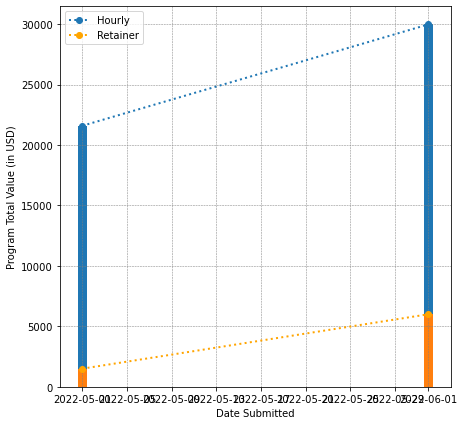

In [63]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query14c = """
    with original AS
    (SELECT 
    round(expert_contractor_invoices.amount + expert_contractor_invoices.sf_margin_amount::numeric, 2) as "Program Total Value",
    expert_contractor_invoices.billing_style_from_selectsystems as "Billing Style",
    expert_contractor_invoices.status,
    expert_contractor_invoices.date_submitted as "Date"
    FROM 
    expert_contractor_invoices 
    WHERE 
    array_to_string(expert_contractor_invoices.billing_style_from_selectsystems, '', '*') = 'Hourly'
    AND
    (expert_contractor_invoices.status = 'Not Yet Invoiced For' OR
    expert_contractor_invoices.status = 'Paid but Not Yet Invoiced' OR
    expert_contractor_invoices.status = 'Not Yet Invoiced, But Pay' OR
    expert_contractor_invoices.status = 'Processing')
    AND
    expert_contractor_invoices.date_submitted > '2022-05-01')
    
    SELECT sum(original."Program Total Value") as "Program Total Value", 
    array_to_string(original."Billing Style", '', '*') as "Billing Style", 
    date_trunc('month', original."Date") as "Date"
    FROM original
    GROUP BY original."Billing Style", date_trunc('month', original."Date")
    """
dataset14c = sqlio.read_sql_query(query14c,conn)
df14c = pd.DataFrame(data=dataset14c)
df14c.to_csv('analysis14c.csv')
print(df14c)

query14d = """
    with original AS
    (SELECT 
    round(expert_contractor_invoices.amount + expert_contractor_invoices.sf_margin_amount::numeric, 2) as "Program Total Value",
    expert_contractor_invoices.billing_style_from_selectsystems as "Billing Style",
    expert_contractor_invoices.status,
    expert_contractor_invoices.date_submitted as "Date"
    FROM 
    expert_contractor_invoices 
    WHERE 
    array_to_string(expert_contractor_invoices.billing_style_from_selectsystems, '', '*') = 'Retainer'
    AND
    (expert_contractor_invoices.status = 'Not Yet Invoiced For' OR
    expert_contractor_invoices.status = 'Paid but Not Yet Invoiced' OR
    expert_contractor_invoices.status = 'Not Yet Invoiced, But Pay' OR
    expert_contractor_invoices.status = 'Processing')
    AND
    expert_contractor_invoices.date_submitted > '2022-05-01')
    
    SELECT sum(original."Program Total Value") as "Program Total Value", 
    array_to_string(original."Billing Style", '', '*') as "Billing Style", 
    date_trunc('month', original."Date") as "Date"
    FROM original
    GROUP BY original."Billing Style", date_trunc('month', original."Date")
    """
dataset14d = sqlio.read_sql_query(query14d,conn)
df14d = pd.DataFrame(data=dataset14d)
df14d.to_csv('analysis14d.csv')
print(df14d)

# Define Data
xdata1=df14c['Date']
ydata1=df14c['Program Total Value']

xdata2=df14d['Date']
ydata2=df14d['Program Total Value']

# Plot
plt.figure(figsize=(7, 7))
plt.plot(xdata1, ydata1, 'o', linestyle = 'dotted', linewidth=2)
plt.plot(xdata2, ydata2, 'o', linestyle = 'dotted', linewidth=2, color='orange')
plt.bar(xdata1,ydata1)
plt.bar(xdata2,ydata2)
plt.xlabel('Date Submitted')
plt.ylabel('Program Total Value (in USD)')
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)
ax.legend(['Hourly','Retainer'])
plt.show()

   Count Billing Style                   Type
0    131        Hourly  Individual Freelancer
1     18     Flat Rate  Individual Freelancer
2     13      Retainer  Individual Freelancer
   Count Billing Style             Type
0     15      Retainer  Boutique Agency
1     11     Flat Rate  Boutique Agency
2      7        Hourly  Boutique Agency


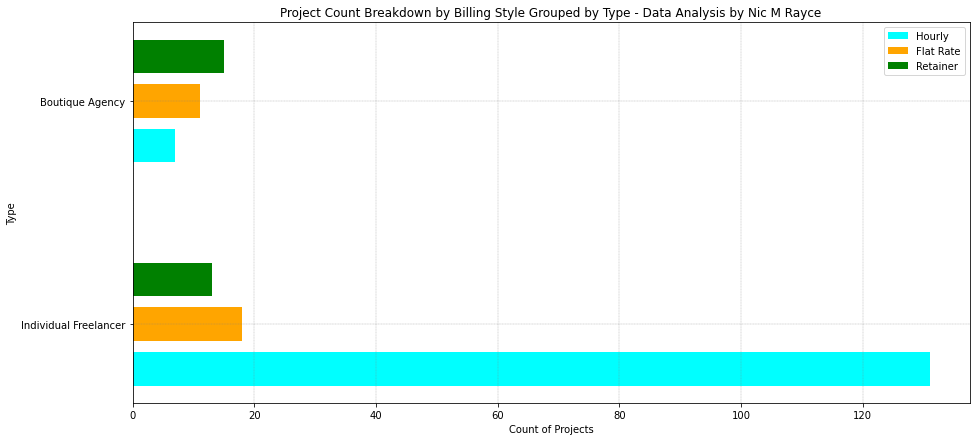

In [139]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query11a = """
    WITH original AS
    (SELECT
    selectsystems.record_id,
    cast(selectsystems.created as date),
    cast(selectsystems.status_last_modified as date),
    selectsystems.billing_style as "Billing Style",
    array_to_string(selectsystems.type_from_expert, '', '*') as "Type",
    selectsystems.sf as "Commission"
    FROM 
    selectsystems
    WHERE 
    array_to_string(selectsystems.type_from_expert, '', '*') = 'Individual Freelancer' 
    OR array_to_string(selectsystems.type_from_expert, '', '*') = 'Boutique Agency')
    
    SELECT count(original."Billing Style") as "Count", 
    original."Billing Style" as "Billing Style", 
    original."Type" as "Type"
    FROM original
    WHERE original."Type" = 'Individual Freelancer'
    GROUP BY original."Type", original."Billing Style"
    ORDER BY 1 DESC
    LIMIT 3
"""
dataset11a = sqlio.read_sql_query(query11a,conn)
df11a = pd.DataFrame(data=dataset11a)
df11a.to_csv('analysis11a.csv')
print(df11a)

query12a = """
    WITH original AS
    (SELECT
    selectsystems.record_id,
    cast(selectsystems.created as date),
    cast(selectsystems.status_last_modified as date),
    selectsystems.billing_style as "Billing Style",
    array_to_string(selectsystems.type_from_expert, '', '*') as "Type",
    selectsystems.sf as "Commission"
    FROM 
    selectsystems
    WHERE 
    array_to_string(selectsystems.type_from_expert, '', '*') = 'Individual Freelancer' 
    OR array_to_string(selectsystems.type_from_expert, '', '*') = 'Boutique Agency')
    
    SELECT count(original."Billing Style") as "Count", 
    original."Billing Style" as "Billing Style", 
    original."Type" as "Type"
    FROM original
    WHERE original."Type" = 'Boutique Agency'
    GROUP BY original."Type", original."Billing Style"
    ORDER BY 1 DESC
    LIMIT 3
"""
dataset12a = sqlio.read_sql_query(query12a,conn)
df12a = pd.DataFrame(data=dataset12a)
df12a.to_csv('analysis12a.csv')
print(df12a)

labels = ['Individual Freelancer', 'Boutique Agency']
hourly = [131,7]
flat = [18, 11]
retainer = [13, 15]

# create data
x = np.arange(2)
y1 = [131,7]
y2 = [18, 11]
y3 = [13, 15]
width = 0.15
  
# plot data in grouped manner of bar type
plt.figure(figsize=(15, 7))
plt.barh(x-0.2, y1, width, color='cyan')
plt.barh(x, y2, width, color='orange')
plt.barh(x+0.2, y3, width, color='green')
plt.yticks(x, ['Individual Freelancer', 'Boutique Agency'])
plt.xlabel("Count of Projects")
plt.ylabel("Type")
plt.legend(["Hourly", "Flat Rate", "Retainer"])
plt.title("Project Count Breakdown by Billing Style Grouped by Type - Data Analysis by Nic M Rayce")
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.3)

plt.show()

    Monthly Period  Number of Experts
0                1                 29
1                2                 47
2                3                 34
3                4                 35
4                5                 39
5                6                 17
6                7                 47
7                8                 43
8                9                 33
9               10                 62
10              11                 81
11              12                  8
12              13                 17
    Month  Retention Rate
0       0          100.00
1       1           94.49
2       2           84.90
3       3           77.96
4       4           70.82
5       5           62.86
6       6           59.39
7       7           49.80
8       8           41.02
9       9           34.29
10     10           21.63
11     11            5.10
12     12            3.47


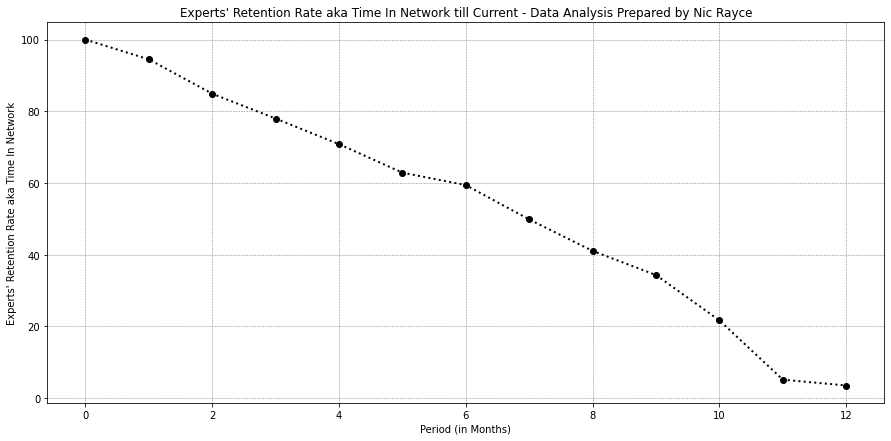

In [26]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")

query13 = """
    
    WITH scenario_1 AS
    (SELECT
    experts.name as "Name",
    cast(experts.status_last_modified as date) - cast(experts.created as date) as "Period"
    FROM 
    experts 
    WHERE experts.previous_status like 'Available%' and experts.status like 'No Longer%'
    ORDER BY experts.name, experts.created ASC)
      
      , scenario_2 AS 
    (SELECT
    experts.name as "Name",
    cast(now() as date) - cast(experts.status_last_modified as date) as "Period"
    FROM 
    experts 
    WHERE experts.previous_status like 'Send Wel%' and experts.status like 'Available%'
    ORDER BY experts.name, experts.created ASC)
    
    , scenario_3 AS
    (SELECT
    experts.name as "Name",
    cast(now() as date) - cast(experts.created as date) as "Period"
    FROM 
    experts 
    WHERE experts.previous_status like 'Available%' and experts.status like 'At Ca%'
    ORDER BY experts.name, experts.created ASC)

      , combined AS 
      (SELECT * from scenario_1 UNION SELECT * from scenario_2 UNION SELECT * from scenario_3)
      

SELECT cast(case when "combined"."Period" >= 0 and "combined"."Period" <= 30    then '  1'
            when "combined"."Period" > 30 and "combined"."Period" <= 60   then ' 2'
            when "combined"."Period" > 60 and "combined"."Period" <= 90  then ' 3'
            when "combined"."Period" > 90 and "combined"."Period" <= 120   then ' 4'
            when "combined"."Period" > 120 and "combined"."Period" <= 150  then ' 5'
            when "combined"."Period" > 150 and "combined"."Period" <= 180  then ' 6'
            when "combined"."Period" > 180 and "combined"."Period" <= 210    then ' 7'
            when "combined"."Period" > 210 and "combined"."Period" <= 240   then ' 8'
            when "combined"."Period" > 240 and "combined"."Period" <= 270  then ' 9'
            when "combined"."Period" > 270 and "combined"."Period" <= 300   then ' 10'
            when "combined"."Period" > 300 and "combined"."Period" <= 330  then ' 11'
            when "combined"."Period" > 330 and "combined"."Period" <= 365  then ' 12'
            else '13' end as integer) as "Monthly Period",
            count(*) as "Number of Experts"
            FROM combined
            GROUP BY 1

"""
dataset13 = sqlio.read_sql_query(query13,conn)
df13 = pd.DataFrame(data=dataset13)
df13.to_csv('analysis13.csv')
print(df13)

df14 = pd.read_csv('retention_data.csv')
print(df14)

# Define Data
xdata1=df14['Month']
ydata1=df14['Retention Rate']
xdata2=df13['Monthly Period']
ydata2=df13['Number of Experts']


# Plot
plt.figure(figsize=(15, 7))
plt.plot(xdata1, ydata1, 'o', linestyle = 'dotted', color ='black', linewidth=2)
plt.title("Experts' Retention Rate aka Time In Network till Current - Data Analysis Prepared by Nic Rayce")
plt.xlabel('Period (in Months)')
plt.ylabel("Experts' Retention Rate aka Time In Network")
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.show()

    Percentage of Active Experts - ALL        Registration Month
0                             0.000000 2022-06-01 00:00:00+00:00
1                             6.451613 2022-05-01 00:00:00+00:00
2                            18.032787 2022-04-01 00:00:00+00:00
3                             8.000000 2022-03-01 00:00:00+00:00
4                             7.692308 2022-02-01 00:00:00+00:00
5                            10.526316 2022-01-01 00:00:00+00:00
6                             2.380952 2021-12-01 00:00:00+00:00
7                            10.526316 2021-11-01 00:00:00+00:00
8                            23.076923 2021-10-01 00:00:00+00:00
9                            12.195122 2021-09-01 00:00:00+00:00
10                           27.500000 2021-08-01 00:00:00+00:00
11                           17.000000 2021-07-01 00:00:00+00:00
12                           53.333333 2021-06-01 00:00:00+00:00
13                           58.333333 2021-05-01 00:00:00+00:00
14                       

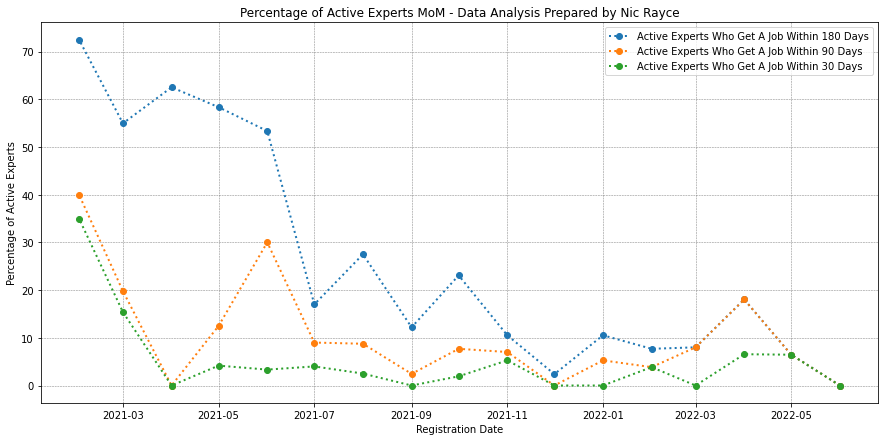

In [14]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NOT NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Active Experts - ALL" , date_trunc('month', cast("source"."Date" as date)) as "Registration Month"
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

query6 = """
    SELECT 
    cast(sum(CASE WHEN "source"."ID" IS NOT NULL AND 
    "source"."Period" <= 30 THEN 1 ELSE 0 END) as float) / count (*) * 100 AS "Percentage of Active Experts within 30 Days", 
    date_trunc('month', "source"."Registration Date") as "Registration Month"
  FROM
(SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      cast (experts.created as date) as "Registration Date",
      selectsystems.created as "Job Onboarding Date",
      cast(selectsystems.created as date) - cast(experts.created as date) as "Period"
    FROM 
    experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', "source"."Registration Date")
      ORDER BY date_trunc('month', "source"."Registration Date") DESC
      """
dataset6 = sqlio.read_sql_query(query6,conn)
df6 = pd.DataFrame(data=dataset6)
print(df6)

query7 = """
    SELECT 
    cast(sum(CASE WHEN "source"."ID" IS NOT NULL AND 
    "source"."Period" <= 90 THEN 1 ELSE 0 END) as float) / count (*) * 100 AS "Percentage of Active Experts within 90 Days", 
    date_trunc('month', "source"."Registration Date") as "Registration Month"
  FROM
(SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      cast (experts.created as date) as "Registration Date",
      selectsystems.created as "Job Onboarding Date",
      cast(selectsystems.created as date) - cast(experts.created as date) as "Period"
    FROM 
    experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', "source"."Registration Date")
      ORDER BY date_trunc('month', "source"."Registration Date") DESC
      """
dataset7 = sqlio.read_sql_query(query7,conn)
df7 = pd.DataFrame(data=dataset7)
print(df7)


# Define Data
xdata1=df5['Registration Month']
ydata1=df5['Percentage of Active Experts - ALL']
xdata2=df7['Registration Month']
ydata2=df7['Percentage of Active Experts within 90 Days']
xdata3=df6['Registration Month']
ydata3=df6['Percentage of Active Experts within 30 Days']

    
# Plot
plt.figure(figsize=(15, 7))
plt.plot(xdata1, ydata1, 'o', linestyle = 'dotted', linewidth=2)
plt.plot(xdata2, ydata2, 'o', linestyle = 'dotted', linewidth=2)
plt.plot(xdata3, ydata3, 'o', linestyle = 'dotted', linewidth=2)
plt.legend(['Active Experts Who Get A Job Within 180 Days', 'Active Experts Who Get A Job Within 90 Days' ,'Active Experts Who Get A Job Within 30 Days'])
plt.title("Percentage of Active Experts MoM - Data Analysis Prepared by Nic Rayce")
plt.xlabel('Registration Date')
plt.ylabel('Percentage of Active Experts')
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)

plt.show()
